In [12]:
import matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Overview of Cars, Registered in Germany (Jan. 2017/18)

Data taken from the website of [Kraftfahrt Bundesamt](https://www.kba.de/DE/Home/home_node.html), which is the government agency dealing with road traffic, as suborganisation of the Federal ministry of Transport and Digital Infrastructure.

Statistical data of registered vehicles, grouped by brand, model and size, comparing Janurary 2017 to Janurary 2018, was downloaded from [here](https://www.kba.de/DE/Statistik/Fahrzeuge/Bestand/Segmente/segmente_node.html).

In [13]:
# Read the Excel file. Define multi header lines, select desired sheet,
# use the first two columns ['Segment', 'Modellreihe'] as index,
# ignore the last 5 rows as they are general information.
pkw_data_2017_18 = pd.read_excel('fz12_2018_xls.xls', usecols=[1,2,3,4,5,6,7],
                                 header=[7,8], 
                                 sheet_name='Segmente_Bestand_2018',
                                 index_col=[0,1], skipfooter = 5)


In [14]:
pkw_data_2017_18.head()

1. Januar 2018             1. Januar 2017              \
Modellreihe                   Anzahl Anteil in %         Anzahl Anteil in %   
MINIS AUSTIN MINI               8364         0.3           8477         0.3   
      CHEVROLET MATIZ          47673         1.5          52306         1.7   
      CHEVROLET SPARK          34527         1.1          35295         1.1   
      CITROEN C1              102387         3.2          99842         3.2   
      DAIHATSU CUORE           28148         0.9          31570           1   

                      Veränderung gegenüber 1. Januar 2017 in %  
Modellreihe                                  Unnamed: 6_level_1  
MINIS AUSTIN MINI                                          -1.3  
      CHEVROLET MATIZ                                      -8.9  
      CHEVROLET SPARK                                      -2.2  
      CITROEN C1                                            2.5  
      DAIHATSU CUORE                                      -10.8

In [15]:
# How to address/locate a specific cell.
pkw_data_2017_18.loc[('MINIS', 'AUSTIN MINI'), ('1. Januar 2018', 'Anzahl')]

8364

In [16]:
# Get the labels of the first index column as a list.
il = pkw_data_2017_18.index.get_level_values(0).tolist()

# Remove dublicates from the index label list.
index_list = list(dict.fromkeys(il))

# Sort index list into segments and segment totals.
segment = []
segment_totals = []
for i in index_list:
    if 'ZUSAMMEN' in i:
        segment_totals.append(i)
    else:
        segment.append(i)

print('Segment:')
print(segment)
print('')
print('Segment totals:')
print(segment_totals)

Segment:
['MINIS', 'KLEINWAGEN', 'KOMPAKTKLASSE', 'MITTELKLASSE', 'OBERE MITTELKLASSE', 'OBERKLASSE', 'SUVs', 'GELÄNDEWAGEN', 'SPORTWAGEN', 'MINI-VANS', 'GROSSRAUM-VANS', 'UTILITIES', 'WOHNMOBILE', 'SONSTIGE ', 'BESTAND INSGESAMT']

Segment totals:
['MINIS ZUSAMMEN', 'KLEINWAGEN ZUSAMMEN', 'KOMPAKTKLASSE ZUSAMMEN', 'MITTELKLASSE ZUSAMMEN', 'OBERE MITTELKLASSE ZUSAMMEN', 'OBERKLASSE ZUSAMMEN', 'SUVs ZUSAMMEN', 'GELÄNDEWAGEN ZUSAMMEN', 'SPORTWAGEN ZUSAMMEN', 'MINI-VANS ZUSAMMEN', 'GROSSRAUM-VANS ZUSAMMEN', 'UTILITIES ZUSAMMEN', 'WOHNMOBILE ZUSAMMEN']


In [17]:
# Extract number of total registered cars by segment and year.
# 2017
car_segment_total_2017 = []
for i in segment_totals[:]:
    val = pkw_data_2017_18.loc[(i, 'SONSTIGE'), ('1. Januar 2017', 'Anzahl')]
    car_segment_total_2017.append(val)

# 2018
car_segment_total_2018 = []
for i in segment_totals[:]:
    val = pkw_data_2017_18.loc[(i, 'SONSTIGE'), ('1. Januar 2018', 'Anzahl')]
    car_segment_total_2018.append(val)

# Segment by year
car_segment_by_year = []
for i in range(len(car_segment_total_2017)):
    car_segment_by_year.append([car_segment_total_2017[i], 
                                 car_segment_total_2018[i]])

car_segment_by_year

[[3109239, 3196353],
 [8916824, 8935418],
 [12002528, 12057075],
 [6925175, 6726037],
 [2031653, 1996372],
 [275750, 280255],
 [2181473, 2622224],
 [2043255, 2210137],
 [860861, 879685],
 [2030937, 2041370],
 [2093798, 2091088],
 [1702737, 1775444],
 [450167, 486893]]

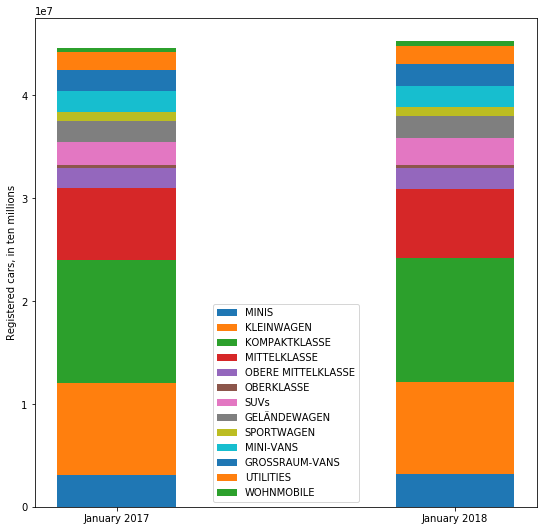

In [18]:
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(9,9))

# Offset values per bar, to stack them correctly.
a = 0
b = 0

for i in range(len(car_segment_by_year[:])):
    plt.bar([0,1], car_segment_by_year[i], width, 
            label=segment[i], bottom=(a, b))
    
    # Add bar size to offset to adjust starting point
    # for the following bar stacked oupon the recent bar.
    a += car_segment_by_year[i][0]
    b += car_segment_by_year[i][1]

plt.legend()  # Upside down compared to bars.
plt.xticks([0,1], ('January 2017', 'January 2018'))
plt.ylabel('Registered cars, in ten millions')

plt.savefig('RegisteredCarsGermany.pdf', dpi=320)

In [19]:
pkw_data_2017_18

1. Januar 2018              \
Modellreihe                                       Anzahl Anteil in %   
MINIS               AUSTIN MINI                     8364         0.3   
                    CHEVROLET MATIZ                47673         1.5   
                    CHEVROLET SPARK                34527         1.1   
                    CITROEN C1                    102387         3.2   
                    DAIHATSU CUORE                 28148         0.9   
                    DAIHATSU MOVE                   2104         0.1   
                    DAIHATSU TREVIS                 3479         0.1   
                    FIAT CINQUECENTO                5844         0.2   
                    FIAT PANDA                    190519         6.0   
                    FIAT SEICENTO                  24982         0.8   
                    FIAT 500                      230151         7.2   
                    FORD KA                       175345         5.5   
                    HYUNDAI ATOS                   24517         0.8   
                    HYUNDAI I 10                  180271         5.6   
                    KIA PICANTO                   117628         3.7   
                    LANCIA YPSILON                  9071         0.3   
                    MITSUBISHI I-MIEV               1041         0.0   
                    NISSAN PIXO                    12496         0.4   
                    OPEL ADAM                     108675         3.4   
                    OPEL AGILA                     91710         2.9   
                    OPEL KARL                      22777         0.7   
                    PEUGEOT ION                     1073         0.0   
                    PEUGEOT 106                    32351         1.0   
                    PEUGEOT 107                    55183         1.7   
                    PEUGEOT 108                    12261         0.4   
                    RENAULT TWINGO                373864        11.7   
                    SEAT AROSA                     37147         1.2   
                    SEAT MARBELLA                   1396         0.0   
                    SEAT MII                       54525         1.7   
                    SKODA CITIGO                   77552         2.4   
...                                                  ...         ...   
UTILITIES           TOYOTA HIACE                    2002         0.1   
                    TOYOTA PROACE                   2215         0.1   
                    VW CADDY                      364576        20.5   
                    VW CRAFTER                      8799         0.5   
                    VW LT                           2639         0.1   
                    VW TRANSPORTER                528318        29.8   
                    VW TYP 2                        5173         0.3   
                    SONSTIGE                        4660         0.3   
UTILITIES ZUSAMMEN  SONSTIGE                     1775444         3.8   
WOHNMOBILE          CITROEN C25                     1216         0.2   
                    CITROEN JUMPER                 16115         3.3   
                    FIAT DUCATO                   231994        47.6   
                    FORD TRANSIT, TOURNEO          35428         7.3   
                    IVECO DAILY                     9664         2.0   
                    MERCEDES L 300-REIHE            1239         0.3   
                    MERCEDES MB 100                 1287         0.3   
                    MERCEDES SPRINTER              21814         4.5   
                    MERCEDES V-KLASSE               2981         0.6   
                    MERCEDES VIANO                  3923         0.8   
                    MERCEDES VITO                   1117         0.2   
                    PEUGEOT BOXER                   5897         1.2   
                    PEUGEOT J5                      3671         0.8   
                    RENAULT MASTER                  1033         0.2   
          

In [20]:
# How to address/locate a specific cell.
for i in segment:
    pkw_data_2017_18.loc[(i), ('1. Januar 2018', 'Anzahl')].to_frame().sort_values(('1. Januar 2018', 'Anzahl'), ascending=False)

In [32]:
pkw_data_2017_18.loc[('MINIS'), [('1. Januar 2018', 'Anzahl')]].sort_values(('1. Januar 2018', 'Anzahl'), ascending=False)

,1. Januar 2018
Modellreihe,Anzahl
SMART FORTWO,376576
RENAULT TWINGO,373864
VW UP,233815
FIAT 500,230151
FIAT PANDA,190519
HYUNDAI I 10,180271
FORD KA,175345
VW LUPO,152870
TOYOTA AYGO,147085


In [22]:
# pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]

In [23]:
# data_plot_left = pkw_data_2017_18.loc[(segment[0]), 
#                                       [('1. Januar 2017', 
#                                         'Anzahl')]].sort_values(('1. Januar 2017', 
#                                                                  'Anzahl'), ascending=False)
# data_plot_left[('1. Januar 2017','Anzahl')]

In [24]:
# i=0
# data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
#                                       [('1. Januar 2017', 
#                                         'Anzahl')]].sort_values(('1. Januar 2017', 
#                                                                  'Anzahl'), ascending=False)
# print(data_plot_left.index.tolist())#
# print(data_plot_left[('1. Januar 2017','Anzahl')]/1000)

# x = data_plot_left.index.tolist()
# y = data_plot_left[('1. Januar 2017','Anzahl')].tolist()
# print(x)
# print(y)
# # plt.bar(x, 
# #         y,
# #         width=0.8)
# plt.plot(x,y)

Text(0.5,1,"Segment:'MINIS', 1. Januar 2018")

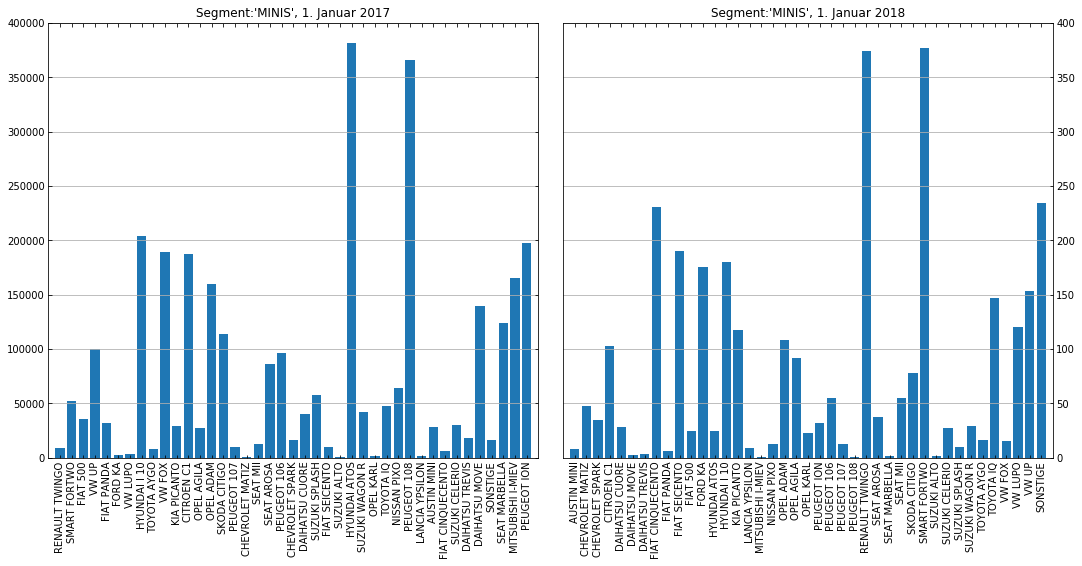

In [25]:
plt.clf()

fig_x = 18
fig_y = 8

i=0

# Begin Plot.
f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

f.tight_layout()
f.subplots_adjust(wspace = 0.05)

# Draw axis ticks on the inside of the plot.
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# Plot left side.
ax1 = f.add_subplot(1, 2, 1)
# Ticks at all axis.
ax1.tick_params(bottom=True, top=True, 
               left=True, right=True)


num_car_brands = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

# Prepare data to plot, sorting the brands by most cars.
data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
                                      [('1. Januar 2017', 
                                        'Anzahl')]].sort_values(('1. Januar 2017', 
                                                                 'Anzahl'), ascending=False)
x_label_left = data_plot_left.index.tolist()

ax1.set_xticks(range(num_car_brands))
ax1.set_xticklabels(x_label_left,#pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                    rotation='vertical')
# for tick in ax1.get_xticklabels():
#     tick.set_rotation(45)

# data_plot_left = pkw_data_2017_18.loc[(segment[i]), 
#                                       [('1. Januar 2017', 
#                                         'Anzahl')]].sort_values(('1. Januar 2017', 
#                                                                  'Anzahl'), ascending=False)

# ax1.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
#         pkw_data_2017_18.loc[segment[i]][('1. Januar 2017','Anzahl')]/1000, 
#         width=0.8)
ax1.bar(x_label_left, 
        data_plot_left[('1. Januar 2017','Anzahl')].tolist(),
        width=0.8)

ax1.grid(axis='y')
ax1.set_xlim(-1,num_car_brands)
ax1.set_ylim(0,400000)

ax1.set_title("Segment:'{}', 1. Januar 2017".format(segment[i]))


# Plot right side.
ax2 = f.add_subplot(1, 2, 2)
# Ticks at all axis.
ax2.tick_params(bottom=True, top=True, 
               left=True, right=True)
ax2.yaxis.tick_right()




num_car_brands = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

ax2.set_xticks(range(num_car_brands))
ax2.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                    rotation='vertical')
# ax2.yaxis.set_label_position("right")

ax2.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
        pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]/1000, 
        width=0.8)

ax2.grid(axis='y')
ax2.set_xlim(-1,num_car_brands)
ax2.set_ylim(0,400)

ax2.set_title("Segment:'{}', 1. Januar 2018".format(segment[i]))

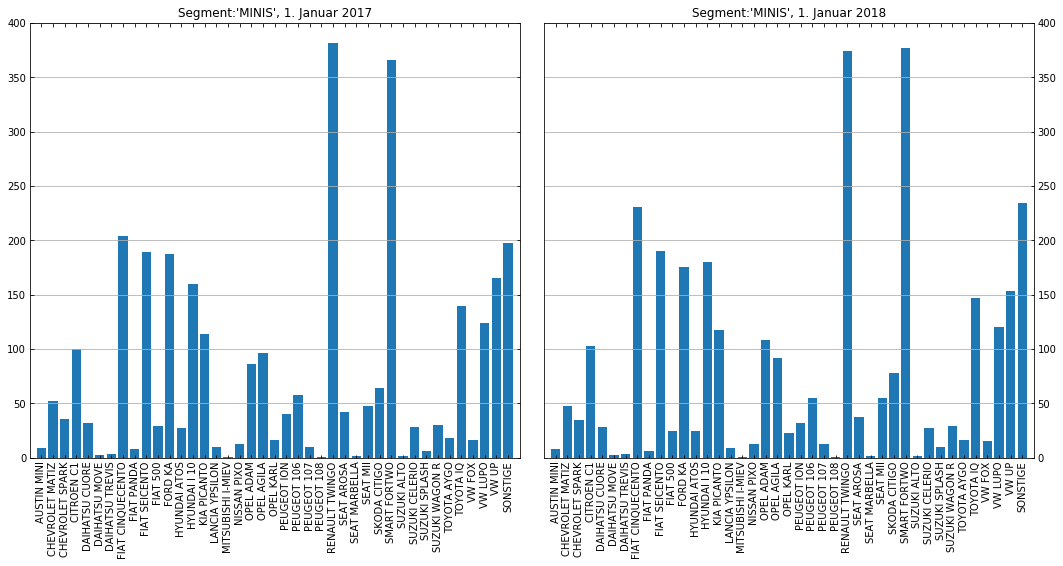

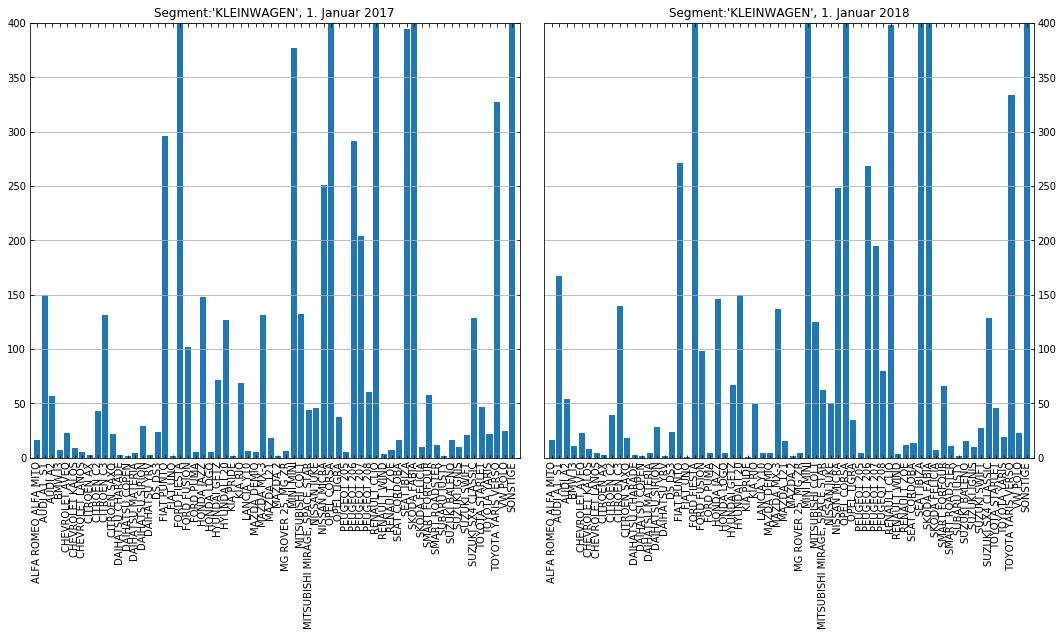

In [26]:
for i in range(len(segment[:2])):
    # Begin Plot.
    f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

    f.tight_layout()
    f.subplots_adjust(wspace = 0.05)

    # Draw axis ticks on the inside of the plot.
    matplotlib.rcParams['xtick.direction'] = 'in'
    matplotlib.rcParams['ytick.direction'] = 'in'

    # Plot left side.
    ax1 = f.add_subplot(1, 2, 1)
    # Ticks at all axis.
    ax1.tick_params(bottom=True, top=True, 
                   left=True, right=True)


    num_car_brands = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

    ax1.set_xticks(range(num_car_brands))
    ax1.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                        rotation='vertical')
    # for tick in ax1.get_xticklabels():
    #     tick.set_rotation(45)

    ax1.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
            pkw_data_2017_18.loc[segment[i]][('1. Januar 2017','Anzahl')]/1000, 
            width=0.8)
    ax1.grid(axis='y')
    ax1.set_xlim(-1,num_car_brands)
    ax1.set_ylim(0,400)

    ax1.set_title("Segment:'{}', 1. Januar 2017".format(segment[i]))


    # Plot right side.
    ax2 = f.add_subplot(1, 2, 2)
    # Ticks at all axis.
    ax2.tick_params(bottom=True, top=True, 
                   left=True, right=True)
    ax2.yaxis.tick_right()




    num_car_brands = len(pkw_data_2017_18.loc[segment[i]].index.tolist())

    ax2.set_xticks(range(num_car_brands))
    ax2.set_xticklabels(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
                        rotation='vertical')
    # ax2.yaxis.set_label_position("right")

    ax2.bar(pkw_data_2017_18.loc[segment[i]].index.tolist(), 
            pkw_data_2017_18.loc[segment[i]][('1. Januar 2018','Anzahl')]/1000, 
            width=0.8)

    ax2.grid(axis='y')
    ax2.set_xlim(-1,num_car_brands)
    ax2.set_ylim(0,400)

    ax2.set_title("Segment:'{}', 1. Januar 2018".format(segment[i]))

In [27]:
index_dict = {}
for i in segment:
    index_dict[i] = pkw_data_2017_18.loc[(i)].index.tolist()

In [28]:
index_dict

{'BESTAND INSGESAMT': ['SONSTIGE'],
 'GELÄNDEWAGEN': ['AUDI Q3',
  'AUDI Q5',
  'AUDI Q7',
  'BMW X3',
  'BMW X5',
  'BMW X6',
  'CADILLAC ESCALADE',
  'DAIHATSU FEROZA',
  'DODGE NITRO',
  'FORD MAVERICK',
  'HUMMER H2',
  'HYUNDAI SANTA FE',
  'HYUNDAI TERRACAN',
  'JAGUAR F-PACE',
  'JEEP CHEROKEE',
  'JEEP COMMANDER',
  'JEEP COMPASS',
  'JEEP GRAND CHEROKEE',
  'JEEP PATRIOT',
  'JEEP RENEGADE',
  'JEEP WRANGLER',
  'KIA SORENTO',
  'LAND ROVER DEFENDER',
  'LAND ROVER DISCOVERY',
  'LAND ROVER DISCOVERY SPORT',
  'LAND ROVER FREELANDER',
  'LAND ROVER RANGE ROVER',
  'LAND ROVER RANGE ROVER EVOQUE',
  'LAND ROVER RANGE ROVER SPORT',
  'MERCEDES G-KLASSE',
  'MERCEDES GL-KLASSE, GLS',
  'MERCEDES ML-KLASSE, GLE',
  'MITSUBISHI HDPIC GALLOPER',
  'MITSUBISHI L200',
  'MITSUBISHI PAJERO',
  'MITSUBISHI PAJERO PININ',
  'NISSAN PATHFINDER',
  'NISSAN PATROL',
  'NISSAN TERRANO II',
  'NISSAN X-TRAIL',
  'OPEL FRONTERA',
  'PORSCHE CAYENNE',
  'PORSCHE MACAN',
  'SKODA KODIAQ',
  'SSA

In [29]:
index_dict[segment[0]]

['AUSTIN MINI',
 'CHEVROLET MATIZ',
 'CHEVROLET SPARK',
 'CITROEN C1',
 'DAIHATSU CUORE',
 'DAIHATSU MOVE',
 'DAIHATSU TREVIS',
 'FIAT CINQUECENTO',
 'FIAT PANDA',
 'FIAT SEICENTO',
 'FIAT 500',
 'FORD KA',
 'HYUNDAI ATOS',
 'HYUNDAI I 10',
 'KIA PICANTO',
 'LANCIA YPSILON',
 'MITSUBISHI I-MIEV',
 'NISSAN PIXO',
 'OPEL ADAM',
 'OPEL AGILA',
 'OPEL KARL',
 'PEUGEOT ION',
 'PEUGEOT 106',
 'PEUGEOT 107',
 'PEUGEOT 108',
 'RENAULT TWINGO',
 'SEAT AROSA',
 'SEAT MARBELLA',
 'SEAT MII',
 'SKODA CITIGO',
 'SMART FORTWO',
 'SUZUKI ALTO',
 'SUZUKI CELERIO',
 'SUZUKI SPLASH',
 'SUZUKI WAGON R',
 'TOYOTA AYGO',
 'TOYOTA IQ',
 'VW FOX',
 'VW LUPO',
 'VW UP',
 'SONSTIGE']

In [30]:
data_set=sim_result_dfs 
title='C219_13e, MT3, Workstation Simulations'
x_label='Time /s'
y_label='Energy Release Rate /kW'
# exp_df=None, 
model_df=mt3_exp_data 
x_min=0 
x_max=3000 
y_min=0 
y_max=250 
# new_file_name=None 
fig_x=18 
fig_y=8

data_x_label='Time'
data_y_label='HRR'
mod_x_label='Time'
mod_y_label='HRR'

with_lines = [2,7]


# x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

# y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)


# f = plt.figure()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()


# Draw axis ticks on the inside of the plot.
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

num_plots = len(data_set)
    
f = plt.figure(figsize=(fig_x, fig_y))#, wspace = 0.2)#gridspec_kw = {'wspace':0, 'hspace':0})

f.tight_layout()
f.subplots_adjust(wspace = 0.075)

# Plot left side.
ax1 = f.add_subplot(1, 2, 1)
# Ticks at all axis.
ax1.tick_params(bottom=True, top=True, 
               left=True, right=True)

# # Plot experimental data.
# if exp_df is not None:
#     plt.plot(exp_df.Time, 
#              exp_df.HRR, color='b', 
#              marker='.', linestyle='None')
# Plot model data, related to above experiment.
if model_df is not None:
    ax1.plot(model_df[mod_x_label], 
             model_df[mod_y_label], color='k')

plt.gca().set_prop_cycle(plt.cycler('color', 
                                    plt.cm.viridis(np.linspace(0, 1, 
                                                               num_plots))))

for data_series in sim_result_dfs[:]:
#     print('Sim')
    ax1.plot(data_series[data_x_label],
            data_series[data_y_label])

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

plt.title(title)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)

# Grid as background.
ax1.grid('on', linestyle=':')

# Plot right side.
ax2 = f.add_subplot(1, 2, 2)
ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# Ticks at all axis.
ax2.tick_params(bottom=True, top=True,
                left=True, right=True, 
                labelleft=False, labelright=True)
ax2.yaxis.set_label_position("right")

# Plot vertical lines for orientation.
for i in range(36):
    ax2. plot([i+1,i+1], [-0.1,1.1], color='lightgrey')


plt.gca().set_prop_cycle(plt.cycler('color', 
                                    plt.cm.viridis(np.linspace(0, 1, 
                                                               num_plots))))
for i, para_set in enumerate(normalised_para_set[:num_plots]):
#     print('Para')
    for j in with_lines:
        if i == j:
            ax2.plot(para_set[0], para_set[1], 
                     linestyle='-', marker='o')
        else:
            ax2.plot(para_set[0], para_set[1], 
                     linestyle='', marker='.')


ax2.set_xlim(0, 37)
ax2.set_ylim(0, 1)

ax2.set_xlabel('Parameters')
ax2.set_ylabel('Normalised Sampling Range')

# Grid as background.
# ax2.grid('off', linestyle=':')

# plt.savefig('Cars_DoubleTest{}.png'.format(imp_label), 
#             dpi=350)

NameError: name 'sim_result_dfs' is not defined